#  <font color=#8A0808><center><span style="border:1px solid black;"> -Computational Statistics Week 4- </center></font>
   
###  <font color=#045FB4><b>LE MEUR Vincent</b></font>

Chapitres 6-10 et 14

# Exercice 6.12  

Soit $Y_0$,$Y_1$,$Y_2$,...$Y_n$ des variables aléatoires indépendantes et identiquement distribuées à valeur dans $\mathds{N}_+$.
On considère $Z_n=\sum_{i=0}^{n}{Y_i}$


## a) Montrons que (Zn) est une chaîne de Markov et étudions son irreductibilité

Soient $a$ et $b$ deux entiers naturels strictements positifs. (Zn) est une somme de variables aléatoires entières et positives strictement.  Il s'agit d'une chaîne de markov avec pour noyau de transitions : 


$\mathcal{P}(Z_n=a|Z_{n-1}=b) =0$ si a<b 



$\mathcal{P}(Z_n=a|Z_{n-1}=b) =\mathcal{P}(Y_n=a-b)$ si b$\leq$a 

En revanche (Zn) n'est pas irréductible. 
En effet, prenons a>b>0 alors :
$\mathcal{P}(Z_n=a|Z_{0}=b) =0$ par définition. Or pour avoir l'irréductibilité il faudrait : $\mathcal{P}(Z_n=a|Z_{0}=b) >0$ 

## b) Soit $V_{n}^{+} =inf\{Z_m -n,Z_m>n\}$. Montrons que $(V_n^+)$ est une chaîne de Markov :

Soit $m_0=inf\{m,Z_m>n\}$ , ainsi $V_{n}^{+} =Z_{m_0} - n >0$

On peut alors définir son noyau de transition pour $a>0$, $b>0$  : 

$$\begin{equation}
  \left\{
      \begin{aligned}
       \mathcal{P}(V_{n}^{+}=a|V_{n-1}^{+})={P}(Y_{m_0}=a-b) >0 \text{   si a>b}\\
       \mathcal{P}(V_{n}^{+}=a|V_{n-1}^{+})=0  \text{     sinon}
      \end{aligned}
    \right.
\end{equation}$$

On a donc bien définit une chaîne de Markov

## c) Etudions les cas où $V_{n}^{+} =k>1$ et  $V_{n}^{+} =1$

BULLSHIT PEUX MIEUX FAIRE LOOSER

# Exercice 6.38 

Dans cet exercice on considère $(a_n)$ une suite de réels convergeant vers $a$.
On considère alors $b_n=\dfrac{a_1+a_2+...+a_n}{n}$. 

Montrons alors que $lim_n b_n = a$.

On revient à la définition de la limite de la suite $(a_n)$ :

$\forall \epsilon >0, \exists n_0 \in \mathds{N}$ tel que $\forall n\geq n_0, |a_n-a| \leq \epsilon $

Par ailleurs en prenant $n>n0$, en utilisant la définition de la limite précedente et l'inégalité triangulaire : 

$$\begin{aligned}
|b_n-a|&=\mid\frac{1}{n}\sum_{j=1}^na_j-a\mid=\frac{1}{n}\mid\sum_{j=1}^{n}a_j-na\mid \\
&=\frac{1}{n}\mid\sum_{j=1}^{n_0-1}(a_j-a)+\sum_{j=n_0}^{n}(aj-a)\mid   \\
&\leq \frac{1}{n}\mid\sum_{j=1}^{n_0-1}(a_j-a)\mid + \frac{1}{n}\sum_{j=n_0}^{n}\mid(aj-a)\mid \\
&\leq \frac{1}{n}\mid\sum_{j=1}^{n_0-1}(a_j-a)\mid + \frac{(n-n_0+1)\epsilon}{n} \\
&\leq \frac{1}{n}\mid\sum_{j=1}^{n_0-1}(a_j-a)\mid + \epsilon
\end{aligned}
$$

Or la première somme est finie donc $\forall \lambda >0, \exists n_1 \in \mathbb{N}$ tel que $\forall n\geq n_1, \frac{1}{n}\mid\sum_{j=1}^{n_0-1}(a_j-a)\mid  \leq \lambda $

Ainsi en posant $m=max(n_0,n_1)$ et en choisissant $\lambda = \epsilon$, on obtient que $\forall \epsilon >0$ et $\forall n \geq m$ que $\mid b_n - a \mid \leq 2\epsilon$


Par définition de la limite on a montré que $lim_n b_n = a$

# Exercice 7.6

Dans cet exercice on implémente l'algorithme du problème 7.5 :

On calcule la distribution g à partir de la formule du $7.5,a)$ : $f(x) \propto \dfrac{g(x)}{1-\rho(x)} \propto \dfrac{x^{x-\alpha-1+1}}{x}=x^{\alpha-1}$


On s'intéresse ici au taux d'acceptation de l'algorithme de Metropolis Hastings associée à l'exercice 7.5 en fonction de $\alpha$. On définit alors la fonction suivante : 

In [1]:
accpt_rate= function(alpha,N){
    X=rep(runif(1),N)    # initialisation de la chaine
    cpt<-0  #On initialise un compteur pour le taux d'acceptation
    for (i in 2:N){
        u <- runif(1)
        if (u> 1-X[i-1]) {  # Transition de la chaîne
            X[i]<- rbeta(1,alpha+1,1)
            cpt <-cpt+1
        }
        else{
            X[i]<- X[i-1]
        }} 
    return(cpt/N) # retourne le taux d'acceptation
    }

On trace alors ce taux d'acceptation pour $\alpha \in [0.3,1.7] $  :

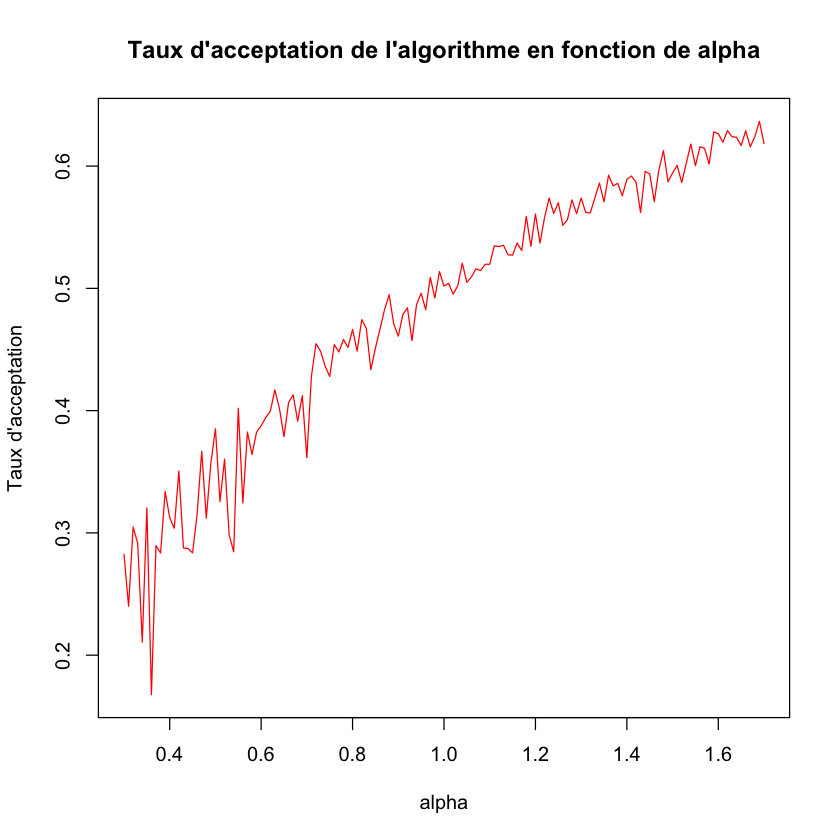

In [2]:
x=seq(from=0.3,to=1.7,by=0.01)
itterations = 10^4
A<-c()
for (k in 1:length(x) ){
    A[k]=accpt_rate(x[k],itterations)
}
plot(x,A,type="l",col="red",main="Taux d'acceptation de l'algorithme en fonction de alpha",xlab="alpha",ylab="Taux d'acceptation")

On constate que quand $\alpha$ est proche de 1, le taux d'acceptation vaut approximativement 0.5. Dans ce cas la fonction stationnaire $f(x) \propto x^0 =1 $ d'où le résultat.

## Exercice 7.27

7.27 Given a Cauchy C(0, σ) instrumental distribution:
- (a) Experimentally select σ to maximize (i)theacceptanceratewhensimulating a N (0, 1) distribution and (ii) the squared error when estimating the mean (equal to 0).
- (b) Same as (a), but when the instrumental distribution is C(x(t),σ).

Dans cet exercice on cherche à simuler une loi normale $\mathcal{N}(0,1)$ à l'aide d'une loi de Cauchy $\mathcal{C}(0,\sigma)$ dans un algorithme de Metropolis-Hastings.

## a) Cherchons $\sigma$ qui optimise le taux d'acceptation et l'erreur quadratique moyenne pour l'estimation de la moyenne

On définit ici encore notre taux d'acceptation accpt_rate2 : 

In [3]:
accpt_rate2= function(sigma,N){
    X=rep(runif(1),N)    # initialisation de la chaine
    cpt=0  #On initialise un compteur pour le taux d'acceptation
    for (i in 2:N){
        Y=rcauchy(1,0,sigma)   # On utilise un candidat Cauchy C(0,sigma)
        rho=(dnorm(Y,mean=0,sd=1)*dcauchy(X[i-1],0,sigma))/(dnorm(X[i-1],mean=0,sd=1)*dcauchy(Y,0,sigma))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<rho) # Ici la condition de transition s'applique
        if (runif(1)<rho){cpt<-cpt+1 # Mise en place du compteur
        }}
    return(cpt/N) # retourne le taux d'acceptation
    
    
    }

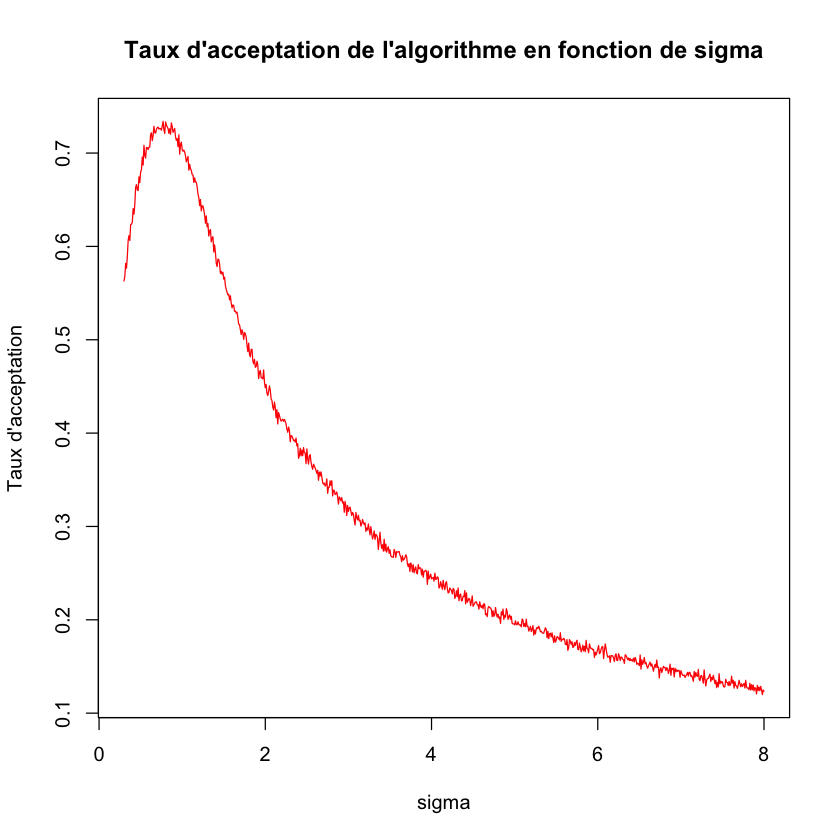

In [4]:
x=seq(from=0.3,to=8,by=0.01)
itterations = 10^4
A1<-c()
for (k in 1:length(x) ){
    A1[k]=accpt_rate2(x[k],itterations)
}
plot(x,A1,type="l",col="red",main="Taux d'acceptation de l'algorithme en fonction de sigma",xlab="sigma",ylab="Taux d'acceptation")

On obtient alors le taux d'acceptation maximal pour $\sigma$ vallant :

In [5]:
x[which(A1==max(A1))]

[1] 0.77

On va à présent chercher à estimer la moyenne de la loi générée et ainsi calculer l'erreur quadratique moyenne. On génère donc une fonction square_mean qui va calculer cette erreur quadratique : 

In [6]:
squared_mean=function(sigma,N) {
    X=rep(runif(1),N)    # initialisation de la chaine
     #On initialise un compteur pour le taux d'acceptation
    for (i in 2:N){
        Y=rcauchy(1,0,sigma)   # On utilise un candidat Cauchy C(0,sigma)
        rho=(dnorm(Y,mean=0,sd=1)*dcauchy(X[i-1],0,sigma))/(dnorm(X[i-1],mean=0,sd=1)*dcauchy(Y,0,sigma))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<rho) # On applique ici la condition de transition
        }
    mu=mean(X)
    
    return(mean(mu^2)) # retourne le taux d'acceptation
    
}

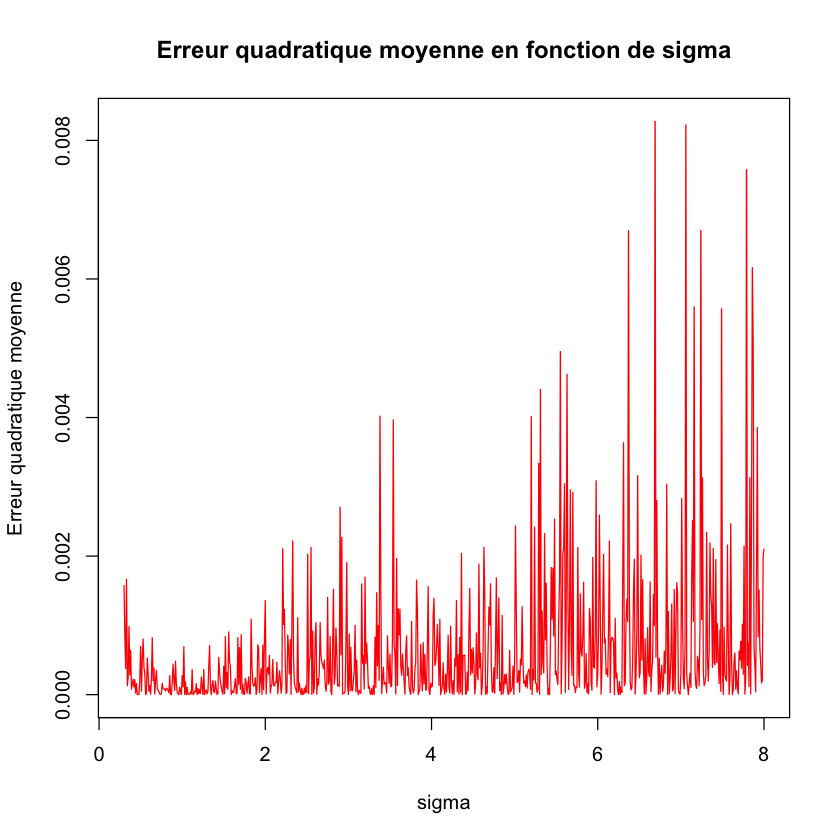

In [7]:
x=seq(from=0.3,to=8,by=0.01)
itterations = 10^4
A2<-c()
for (k in 1:length(x) ){
    A2[k]=squared_mean(x[k],itterations)
}
plot(x,A2,type="l",col="red",main="Erreur quadratique moyenne en fonction de sigma",xlab="sigma",ylab="Erreur quadratique moyenne")

On constate que l'erreur quadratique moyenne est très volatile. L'amplitude de ces variations augmente quand $\sigma$ augmente. On trouve le minimum pour $\sigma$ valant : 

In [27]:
v=which(A2==min(A2))
x[v]
min(A2)

[1] 4.37

[1] 1.635643e-09

Par ailleurs la valeur précédente de $\sigma$ de $0.71$ permet également d'avoir une erreur quadratique moyenne réduite : 

In [26]:
a=which(x==0.71)
A2[a]

[1] 6.414382e-05

## b) On réalise la même étude en considérant une loi de Cauchy $\mathcal{C}(x(t),sigma)$ comme loi candidate 

On définit et on trace à nouveau le taux de convergence : 

[1] 0.3

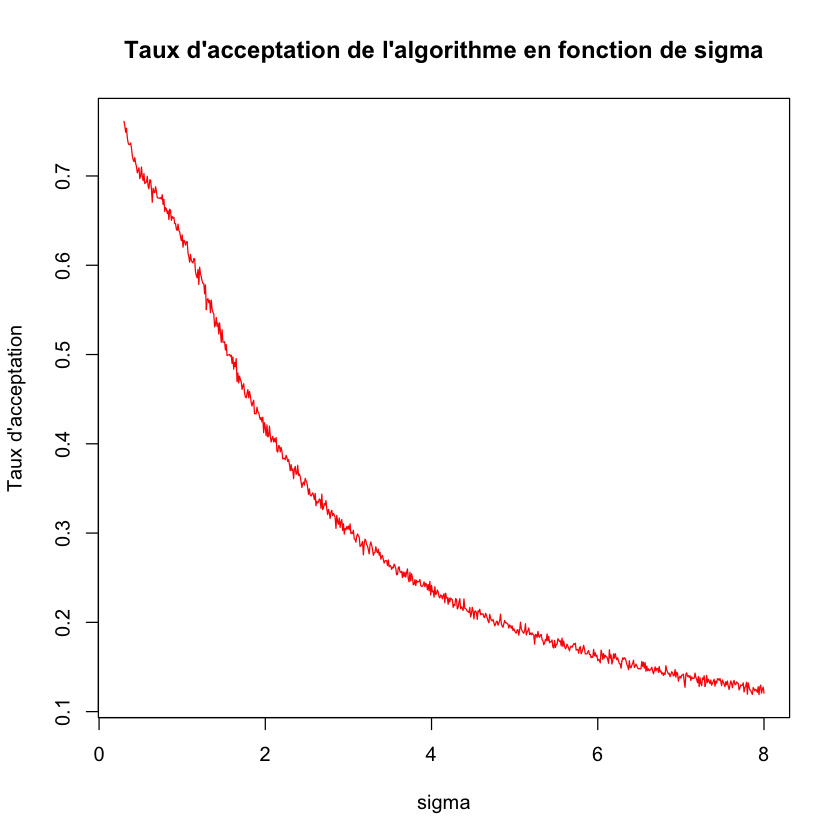

In [9]:
accpt_rate3= function(sigma,N){
    X=rep(runif(1),N)    # initialisation de la chaine
    cpt=0  #On initialise un compteur pour le taux d'acceptation
    for (i in 2:N){
        Y=rcauchy(1,X[i-1],sigma)   # On utilise un candidat Cauchy C(0,sigma)
        rho=(dnorm(Y,mean=0,sd=1)*dcauchy(X[i-1],0,sigma))/(dnorm(X[i-1],mean=0,sd=1)*dcauchy(Y,0,sigma))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<rho) # Ici la condition de transition s'applique
        if (runif(1)<rho){cpt<-cpt+1 # Mise en place du compteur
        }}
    return(cpt/N) # retourne le taux d'acceptation
    }

In [ ]:
x=seq(from=0.3,to=8,by=0.01)
itterations = 10^4
A3<-c()
for (k in 1:length(x) ){
    A3[k]=accpt_rate3(x[k],itterations)
}
plot(x,A3,type="l",col="red",main="Taux d'acceptation de l'algorithme en fonction de sigma",xlab="sigma",ylab="Taux d'acceptation")

In [28]:
x[which(A3==max(A3))]

[1] 0.3

In [29]:
squared_mean2=function(sigma,N) {
    X=rep(runif(1),N)    # initialisation de la chaine
     #On initialise un compteur pour le taux d'acceptation
    for (i in 2:N){
        Y=rcauchy(1,X[i-1],sigma)   # On utilise un candidat Cauchy C(0,sigma)
        rho=(dnorm(Y,mean=0,sd=1)*dcauchy(X[i-1],0,sigma))/(dnorm(X[i-1],mean=0,sd=1)*dcauchy(Y,0,sigma))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<rho) # On applique ici la condition de transition
        }
    mu=mean(X)
    
    return(mean(mu^2)) # retourne l'erreur quadratique
    
}


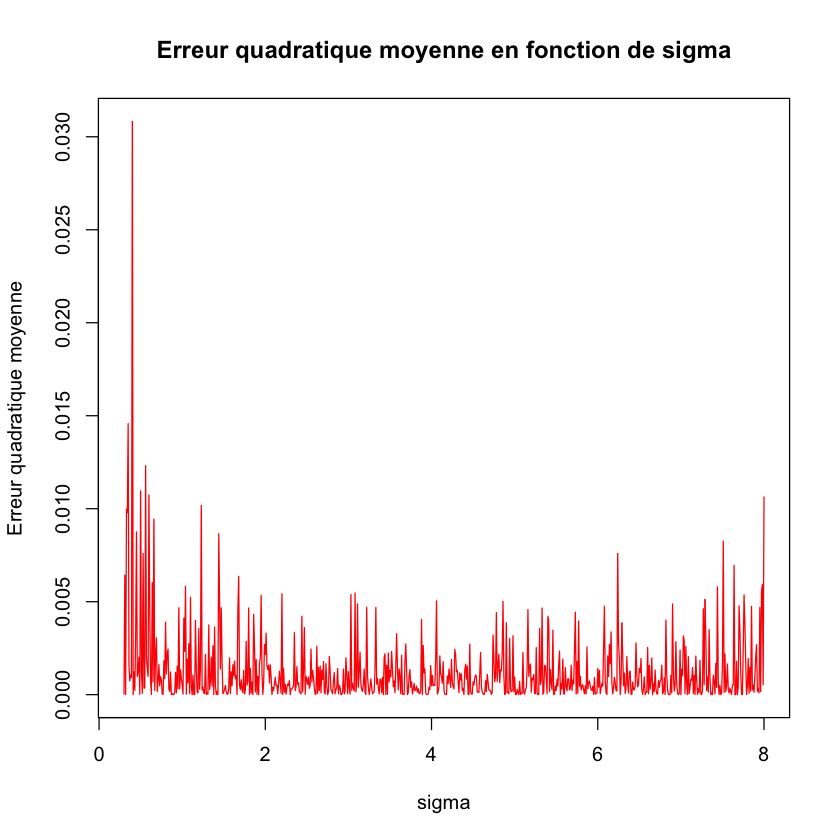

In [30]:
x=seq(from=0.3,to=8,by=0.01)
itterations = 10^4
A4<-c()
for (k in 1:length(x) ){
    A4[k]=squared_mean2(x[k],itterations)
}
plot(x,A4,type="l",col="red",main="Erreur quadratique moyenne en fonction de sigma",xlab="sigma",ylab="Erreur quadratique moyenne")

In [11]:
w=which(A4==min(A4))
x[w]

[1] 5.34

Avec cette nouvelle implémentation il semble que le taux d'acceptation soit maximamle pour $\sigma$ proche de 0, seulement pour ces valeurs l'erreur quadratique moyenne apparaît comme très volatile. Il s'agit donc ici d'un compromis à prendre entre les deux.

## Exercice 7.47

On se place ici dans les conditions de l'exercice 7.27 précédent. 

Calculons la distribution jointe $\Pi(\theta_1,\theta_2 |y)$ à partir des distributions initiales.

$$\begin{aligned} 
\Pi(\theta_1,\theta_2 |y) &\propto exp[\frac{-1}{2}(\theta_1^2\frac{5}{4} +\theta_2^2\frac{5}{4} +\frac{\theta_1+\theta_2}{2}-(\theta_1+\theta_2)y)] \\
&\propto exp[\frac{5}{8}(\frac{2y-\theta_2}{5})^2-\frac{5}{8}\theta_2^2+\frac{1}{2}\theta_2y]exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2] \\
&\propto  exp[\frac{1}{10}y^2+\frac{1}{40}\theta_2^2 -\frac{1}{10}y\theta_2 - \frac{5}{8}\theta_2^2+\frac{1}{2}\theta_2y]exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2]  \\
&\propto   exp[-\frac{3}{5}\theta_2^2 +\frac{2}{5}y\theta_2+\frac{1}{10}y^2]exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2] \\
&\propto exp[-\frac{3}{5}(\theta_2 -\frac{y}{3})^2]exp[\frac{1}{6}y^2]exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2] 
\end{aligned}
$$

On en déduit alors la distribution marginale $\Pi(\theta_2 |y)$ par intégration :

$$ \begin{aligned} 
\Pi(\theta_2 |y) &\propto \int_{\Omega_1}exp[-\frac{3}{5}(\theta_2 -\frac{y}{3})^2]*exp[\frac{1}{6}y^2]*exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2]d\theta1 \\
&\propto exp[-\frac{3}{5}(\theta_2 -\frac{y}{3})^2]*exp[\frac{1}{6}y^2]\int_{\Omega_1}exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2]d\theta_1 \\
&\propto exp[-\frac{3}{5}(\theta_2 -\frac{y}{3})^2] 
\end{aligned}
$$

Ainsi on a bien que $ \theta_2 \thicksim \mathcal{N}(\dfrac{y}{3},\dfrac{5}{6})$

Par ailleurs, puisque $\Pi(\theta_1,\theta_2 |y) \propto exp[-\frac{3}{5}(\theta_2 -\frac{y}{3})^2]*exp[\frac{1}{6}y^2]*exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2] $ alors $\Pi(\theta_1|\theta_2,y) \propto exp[-\frac{5}{8}(\theta_1-\frac{2y-\theta_2}{5})^2]$

D'où, le résultat : 

$\theta_1|\theta_2,y \thicksim \mathcal{N}(\dfrac{2y-\theta_2}{5},\dfrac{4}{5})$

Ainsi à partir des distributions $ \theta_2 \thicksim \mathcal{N}(\dfrac{y}{3},\dfrac{5}{6})$ et $\theta_1|\theta_2,y \thicksim \mathcal{N}(\dfrac{2y-\theta_2}{5},\dfrac{4}{5})$, on peut simuler notre distribution cible $\Pi(\theta_1,\theta_2 |y)$

## Exercice 8.17

Dans cet exercice, on considère la densité suivante $f(u) \propto exp[-u^{\dfrac{1}{d}}]$

Soit $h(u)=log(f(u))$ , on calcule : $\dfrac{\partial h(u)}{\partial u}=\dfrac{-1}{d}u^{\frac{1}{d}-1} = \dfrac{-1}{d}u^{\frac{1-d}{d}} $ puis $\dfrac{\partial^2 h(u)}{\partial u}= \dfrac{d-1}{d^2}u^{\frac{1}{d}-1}$

Ainsi $\dfrac{\partial^2 g(u)}{\partial u} \leq 0 $ si $ d \geq 1 $. Donc $\forall d \geq 1 $, f est donc log-concave sur $\mathbb{R}^+ $

A présent on considère $ f(u) \propto exp[-||x||] $ et on pose alors $h(u) = log(f(u)) = -||x|| + K$ avec $K$ constante réelle. 

On revient alors à la définition de la concavité. Soit $t \in [0,1]$ et $x$ et $y$ deux réels.

$h(tx+(1-t)y) = - ||tx + (1-t)y|| + C \geq ||tx|| + ||(1-t)y|| + K   $ d'après l'inégalité triangulaire associé à la norme ||.|| 

Donc $ h(tx+(1-t)y) \geq th(x) + (1-t)h(y) $

Ainsi $h(u)$ est concave et $\forall d$ f est log-concave.

# Exercice 9.18

Dans cet exercice, on considère l'échantillonneur de Gibbs associé à l'exemple 9.1 vérifiant : 
$$\\
X | y \sim \mathcal{N}(\rho y, 1 - \rho^2) \\
 Y | x \sim \mathcal{N}(\rho x, 1 - \rho^2) $$

## a) Calculons le noyau de transition associé à la chaîne des X

D'après les distributions précedentes on a :

$$ K(x^*,x) = \int_{\Omega_Y}{f_{X|Y}(x,y)f_{Y|X}(x^*,y)dy} = \dfrac{1}{2\pi(1-\rho^2)}\int_{\Omega_Y}{e^{-\dfrac{(x-\rho y)^2+(y-\rho x^*)^2}{2(1-\rho^2)}}dy}=f_{X|X^*}(x|x^*)  $$ d'où le résultat

## b) Cherchons la distribution invariante pour la chaîne des X

On calcule la densité $f(x)$ associé à la chaîne X à partir de la densité précédente et sachant que $X^* \sim \mathcal{N}(0,1)$: 

$$\begin{aligned} f(x) &= \int{f_{X^*}(x^*)f_{X|X^*}(x|x^*)dx^*}  \\ &=\dfrac{1}{2\pi(1-\rho^2)}\dfrac{1}{\sqrt{2\pi}}\int{e^{-\dfrac{(x-\rho y)^2+(y-\rho x^*)^2}{2(1-\rho^2)}}dy}\int{e^{-\dfrac{x^*}{2}}dx^*} \\
&=\dfrac{1}{2\pi(1-\rho^2)}\dfrac{1}{\sqrt{2\pi}}\int{e^{-\dfrac{(x-\rho y)^2}{2(1-\rho^2)}}}\int{e^{-\dfrac{-y^2-2\rho x^*y+\rho^2{x^*}^2+{x^*}^2-\rho^2{x^*}^2}{2(1-\rho^2)}}dydx^*}  \\
&=\dfrac{1}{\sqrt{2\pi}}\int{e^{-\dfrac{(x-\rho y)^2}{2(1-\rho^2)}}e^{-\dfrac{y^2}{2}}}\int{\dfrac{1}{2\pi(1-\rho^2)}e^{-\dfrac{(x^*-\rho y)^2}{2(1-\rho^2)}}dx^*dy}
\end{aligned}$$

On reconnaît pour la seconde intégrale la densité d'une loi $\mathcal{N}(\rho y,1-\rho^2)$ dont l'intégralle vaut 1. Par ailleurs, la première intégrale ne dépend pas de y.

On obtient ainsi :
$$ f(x) \propto \dfrac{1}{\sqrt{2\pi}}e^{-\dfrac{x^2}{2}}$$
Donc $X \sim \mathcal{N}(0,1)$ et $mathcal{N}(0,1)$ est bien la distribution invariante pour la chaîne de Markov en X

## c) Montrons que $ X|x^* \sim \mathcal{N}(\rho^2{x^*}^2,1-\rho^4)$

On reprends l'expression de $K(x^*,x)$ : 

$$\begin{aligned} K(x^*,x)&= \dfrac{1}{2\pi(1-\rho^2)}\int{e^{-\dfrac{(x-\rho y)^2+(y-\rho x^*)^2}{2(1-\rho^2)}}dy }  \\
&=\dfrac{1}{2\pi(1-\rho^2)}\int{e^{-\dfrac{x^2-2\rho x y + \rho^2 y^2+y^2-2\rho x^*y+\rho^2{x^*}^2}{2(1-\rho^2)}}dy }  \\
K(x^*,x) &\propto e^{-\dfrac{x^2+\rho^2{x^*}^2}{2(1-\rho^2)}} \int {e^{-\dfrac{(1+\rho^2)(y^2-\frac{2\rho}{1+\rho^2}(x^*+x))}{2(1-\rho^2)}}dy} \\
&\propto e^{-\dfrac{x^2+\rho^2{x^*}^2}{2(1-\rho^2)}}\int {e^{-\dfrac{(1+\rho^2)[(y-\frac{\rho (x+ x^*)}{1+\rho^2})^2-(\frac{\rho (x +x^*)}{1+\rho^2})^2]}{2(1-\rho^2)}}dy} \\
& \propto e^{-\dfrac{x^2+\rho^2{x^*}^2}{2(1-\rho^2)}-\dfrac{\rho^2(x^*+x)^2}{2(1-\rho^2)(1+\rho^2)}}\int {e^{-\dfrac{(1+\rho^2)(y-\frac{\rho (x+ x^*)}{1+\rho^2})^2}{2(1-\rho^2)}}dy}
\end{aligned}
$$

Ici le terme sous l'intégrale correspond à la densité d'une loi normale $\mathcal{N}(\frac{\rho (x+ x^*)}{1+\rho^2},\frac{1-\rho^2}{1+\rho^2})$ donc son intégralle vaut 1. On en déduit :

$$\begin{aligned}
K(x^*,x)&\propto e^{-\dfrac{x^2+\rho^2{x^*}^2}{2(1-\rho^2)}-\dfrac{\rho^2(x^*+x)^2}{2(1-\rho^2)(1+\rho^2)}} \\
&\propto e^{-\dfrac{\rho^2(x^*+x)^2+(1+\rho^2)(x^2+\rho^2{x^*}^2)}{2(1-\rho^4)}} \\
&\propto e^{-\dfrac{x-\rho^2x^*}{2(1-\rho^4)}}
\end{aligned}
$$

On en déduit donc que $ X|x^* \sim \mathcal{N}(\rho^2{x^*}^2,1-\rho^4)$

## d) Etudions la covariance de la chaîne

D'après les deux questions précedentes, on établit que $X_k=\rho^2X_{k-1}+ U_k$ avec $U_k \sim \mathcal{N}(0,1-\rho^4)$

En raisonnant par une récurence simple on montre alors que :
$X_k = \rho^{2k}X_0 + \sum_{j=0}^{k-1}U_{k-1}\rho^{2j}$

Ainsi : $\\cov(X_k,X_0)=cov(\rho^{2k}X_0 + \sum_{j=0}^{k-1}U_{k-1}\rho^{2j},X_0)\\=cov(\rho^{2k}X_0,X_0)=\rho^{2k}$

Or par hyppothèse $\rho<1$ donc on obtient que la covariance tends vers 0 quand k tends vers l'infini.